In [1]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib



In [2]:
data_dir = "C:/Users/Marko/Desktop/Rice_Image_Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Marko/Desktop/Rice_Image_Dataset')

In [3]:
arborio = list(data_dir.glob('Arborio/*'))[:1500]
basmati = list(data_dir.glob('Basmati/*'))[:1500]
ipsala = list(data_dir.glob('Ipsala/*'))[:1500]
jasmine = list(data_dir.glob('Jasmine/*'))[:1500]
karacadag = list(data_dir.glob('Karacadag/*'))[:1500]

In [4]:
# Contains the images path
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

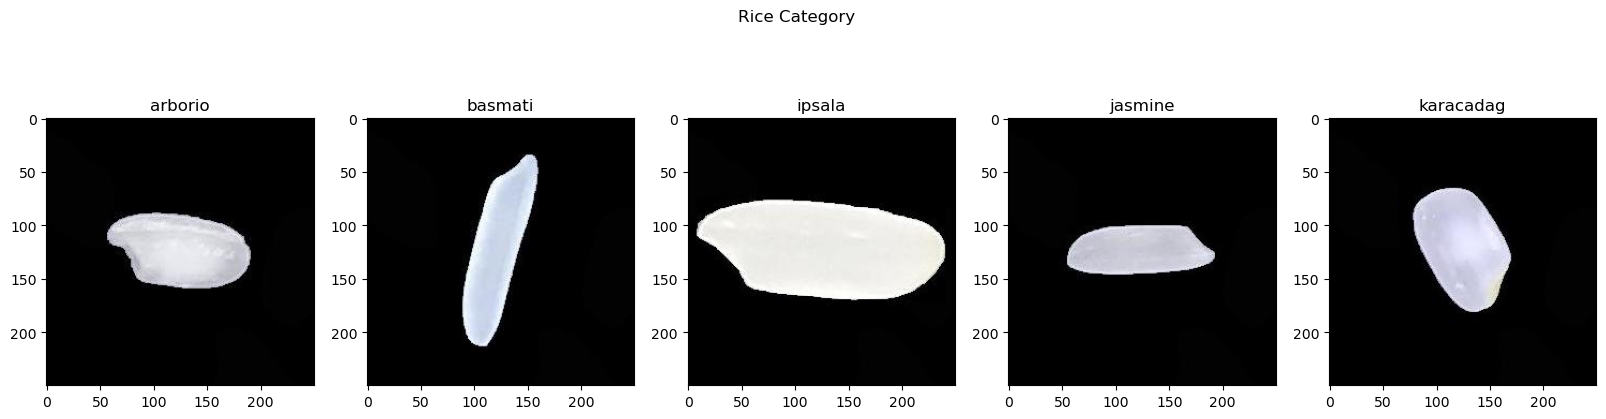

In [5]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [6]:
img = cv2.imread(str(df_images['arborio'][0])) # Converting it into numerical arrays
img.shape # Its currently 250 by 250 by 3

(250, 250, 3)

In [7]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) 
        X.append(resized_img) 
        y.append(df_labels[label])

In [8]:
print(len(X))

7500


In [9]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [10]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
num_label = 5 # number of labels

#model_01.h5
model = tf.keras.Sequential([ 
    keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding = 'same'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(num_label, activation="softmax"),
])

save_model_path = "RiceModel.h5"

In [12]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
model.save("RiceModel.h5")

Epoch 1/20


D:\Anaconda\envs\A\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


176/176 [==============================] - 16s 46ms/step - loss: 0.3742 - acc: 0.8740 - val_loss: 0.8477 - val_acc: 0.8252
Epoch 2/20
176/176 [==============================] - 6s 37ms/step - loss: 0.1289 - acc: 0.9550 - val_loss: 0.4310 - val_acc: 0.9126
Epoch 3/20
176/176 [==============================] - 6s 37ms/step - loss: 0.1153 - acc: 0.9614 - val_loss: 0.2008 - val_acc: 0.9254
Epoch 4/20
176/176 [==============================] - 6s 36ms/step - loss: 0.0916 - acc: 0.9669 - val_loss: 0.1336 - val_acc: 0.9574
Epoch 5/20
176/176 [==============================] - 6s 36ms/step - loss: 0.0842 - acc: 0.9723 - val_loss: 0.3460 - val_acc: 0.8849
Epoch 6/20
176/176 [==============================] - 6s 37ms/step - loss: 0.0802 - acc: 0.9719 - val_loss: 0.2420 - val_acc: 0.9104
Epoch 7/20
176/176 [==============================] - 6s 36ms/step - loss: 0.0856 - acc: 0.9694 - val_loss: 0.1217 - val_acc: 0.9595
Epoch 8/20
176/176 [==============================] - 6s 37ms/step - loss: 0.07

In [13]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 17ms/step - loss: 0.1149 - acc: 0.9758


[0.11491453647613525, 0.9758179187774658]

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

22/22 [==============================] - 2s 38ms/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       269
           1       1.00      0.99      0.99       267
           2       1.00      1.00      1.00       272
           3       0.99      0.93      0.96       289
           4       0.99      0.98      0.98       309

    accuracy                           0.98      1406
   macro avg       0.98      0.98      0.98      1406
weighted avg       0.98      0.98      0.98      1406



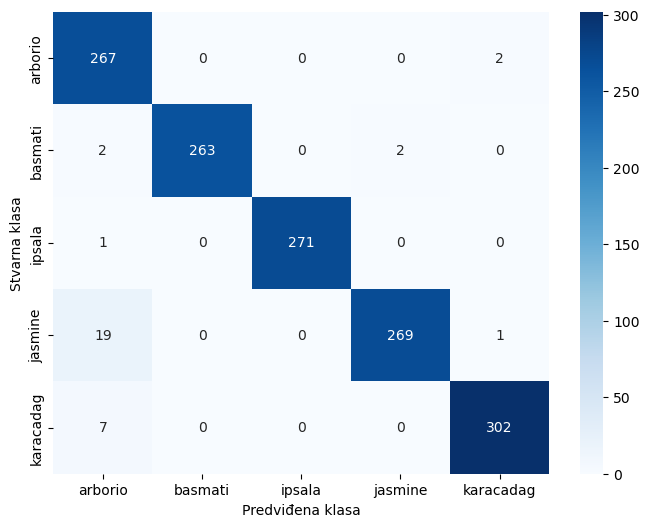

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# prvo dobivamo predikcije na test skupu podataka
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # pretvaramo vjerojatnosti u predikcije

# kreiramo matricu zabune
cm = confusion_matrix(y_test, y_pred)

# vizualiziramo matricu zabune
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag'], 
            yticklabels=['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag'])
plt.ylabel('Stvarna klasa')
plt.xlabel('Predviđena klasa')
plt.show()